##**Import Library**

In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:00


In [ ]:
import os
import glob
import shutil
import random
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

import torch
from ultralytics import YOLO
from google.colab import drive

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#SETUP GPU & MOUNT GOOGLE DRIVE

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Running on:", device)

Running on: cuda


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path dataset ZIP di Google Drive (ubah sesuai lokasi file kamu)
zip_path = "/content/drive/MyDrive/2208108010048_Yumnaa Alifah_Laporan 3_Pemrograman Big Data_Shift P3.zip"
unzip_dir = "/content/dataset"

In [ ]:
# Unzip dataset
!unzip -q "$zip_path" -d "$unzip_dir"

# Tampilkan isi folder utama
!ls "$unzip_dir"

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


#EKSPLORASI DATASET

In [ ]:
# Hitung jumlah gambar dan label per split
for split in ["train", "valid", "test"]:
    img_files = glob.glob(f"{unzip_dir}/{split}/images/*.jpg")
    label_files = glob.glob(f"{unzip_dir}/{split}/labels/*.txt")
    print(f"{split}: {len(img_files)} images, {len(label_files)} labels")

# Contoh isi file label YOLO
sample_label = glob.glob(f"{unzip_dir}/train/labels/*.txt")[0]
print("Contoh anotasi YOLO:\n", open(sample_label).read())

train: 117 images, 117 labels
valid: 15 images, 15 labels
test: 15 images, 15 labels
Contoh anotasi YOLO:
 0 0.5011133333333333 0.36333333333333334 0.79778 0.42


##CLEANING DATA

In [ ]:
# Hapus gambar yang tidak memiliki label
for split in ["train", "valid", "test"]:
    img_dir = f"{unzip_dir}/{split}/images"
    label_dir = f"{unzip_dir}/{split}/labels"
    for img_file in glob.glob(img_dir + "/*.jpg"):
        label_file = os.path.join(label_dir, os.path.basename(img_file).replace(".jpg", ".txt"))
        if not os.path.exists(label_file):
            print("Menghapus gambar tanpa label:", img_file)
            os.remove(img_file)

##TRAINING MODEL (FROM SCRATCH)

In [ ]:
yaml_path = f"{unzip_dir}/data.yaml"
print("Isi data.yaml:\n", open(yaml_path).read())

# Load arsitektur YOLOv8 tanpa pretrained weights
model = YOLO("yolov8n.yaml").to(device)

# Training
results = model.train(
    data=yaml_path,
    epochs=1000,
    imgsz=640,
    batch=16,
    device=device,
    optimizer="SGD",
    lr0=0.01,
    patience=20,
    augment=True,
    name="yolov8n-scratch"
)

Isi data.yaml:
 train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['Laptops', 'Mobiles', 'Supercars']

roboflow:
  workspace: yumnaa-alifah
  project: laporan-3-ath76
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/yumnaa-alifah/laporan-3-ath76/dataset/3
Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1000, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, ko

##EVALUASI MODEL

In [ ]:
metrics = model.val(split="test")  # evaluasi di dataset test
print("Evaluation metrics:", metrics)

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1628.6±900.8 MB/s, size: 77.1 KB)
val: Scanning /content/dataset/test/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 15/15 20.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.4it/s 0.7s
                   all         15         16      0.746      0.933      0.899       0.62
               Laptops          4          5      0.662        0.8      0.839      0.583
               Mobiles          8          8      0.987          1      0.995      0.748
             Supercars          3          3      0.589          1      0.863      0.527
Speed: 0.4ms preprocess, 12.7ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to /content/runs/detect/yolov8n-scratch92
Eva

##INFERENCE

Prediksi untuk: /content/dataset/test/images/download-10-_jpg.rf.495a5de25b24d2d295ecc9844a279143.jpg

image 1/1 /content/dataset/test/images/download-10-_jpg.rf.495a5de25b24d2d295ecc9844a279143.jpg: 640x640 2 Mobiless, 21.7ms
Speed: 2.4ms preprocess, 21.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/yolov8n-scratch925


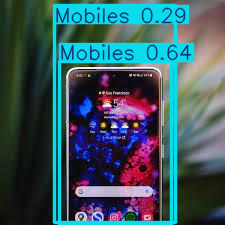

In [ ]:
test_imgs = glob.glob(f"{unzip_dir}/test/images/*.jpg")
sample_img = random.choice(test_imgs)
print("Prediksi untuk:", sample_img)

results = model.predict(source=sample_img, conf=0.25, save=True)

# Visualisasi hasil prediksi
for r in results:
    r.show()